In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Import Dataset for Life Expectancy
df_life = pd.read_csv(r'/Users/brittanyfreese/Documents/Career Foundry/Life Expectancy/lifedata.csv', index_col = False)

In [4]:
#Check the head of dataframe
df_life.head(100)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Argentina,2000,Developing,74.1,137.0,12,7.68,1349.025282,NaN,6,...,88.0,9.21,83.0,0.1,7669.273916,3757452.0,1.2,1.1,0.764,15.0
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.000000,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
97,Armenia,2014,Developing,74.6,12.0,1,3.91,295.608714,93.0,13,...,95.0,4.48,93.0,0.1,3994.712355,29622.0,2.1,2.1,0.739,12.7
98,Armenia,2013,Developing,74.4,123.0,1,3.79,279.429081,95.0,10,...,96.0,4.55,95.0,0.1,3843.591213,289359.0,2.1,2.1,0.736,12.7


In [5]:
#Check to see all column names/variables
df_life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
#Check the shape
df_life.shape

(2938, 22)

In [7]:
#Check Descriptive Statistics
df_life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
#Check dataframe info
df_life.info

<bound method DataFrame.info of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \


In [9]:
#Check for missing values
df_life.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<AxesSubplot:>

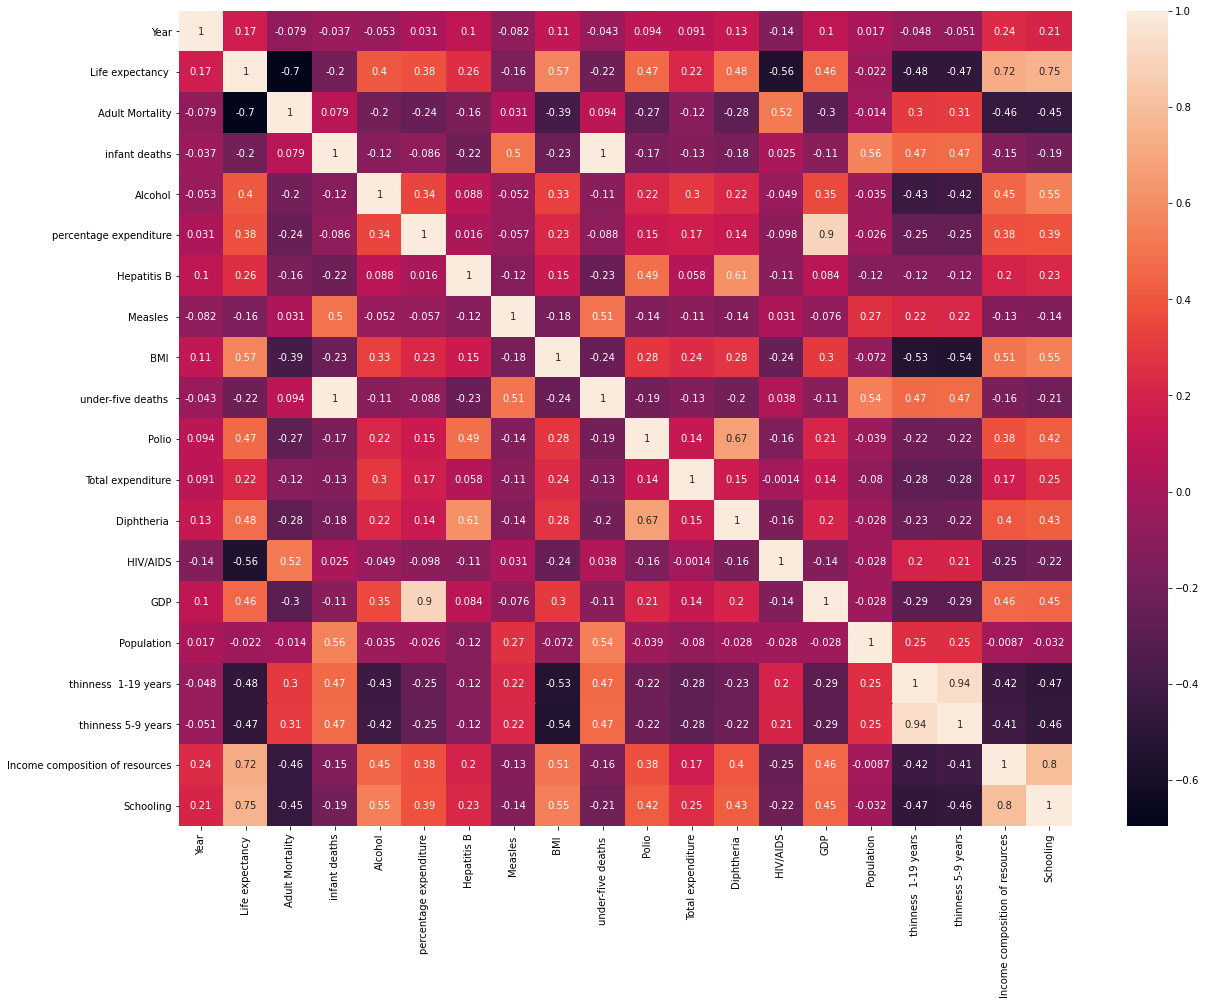

In [10]:
#Check correlations
plt.figure(figsize = (20,15))
sns.heatmap(df_life.corr(),annot = True)

In [11]:
#Fill Null Values with Mean Values for Adult Mortality and Life Expectancy
df_life['Adult Mortality']=df_life['Adult Mortality'].fillna(value=df_life['Adult Mortality'].mean())
df_life['Life expectancy ']=df_life['Life expectancy '].fillna(value=df_life['Life expectancy '].mean())

<AxesSubplot:>

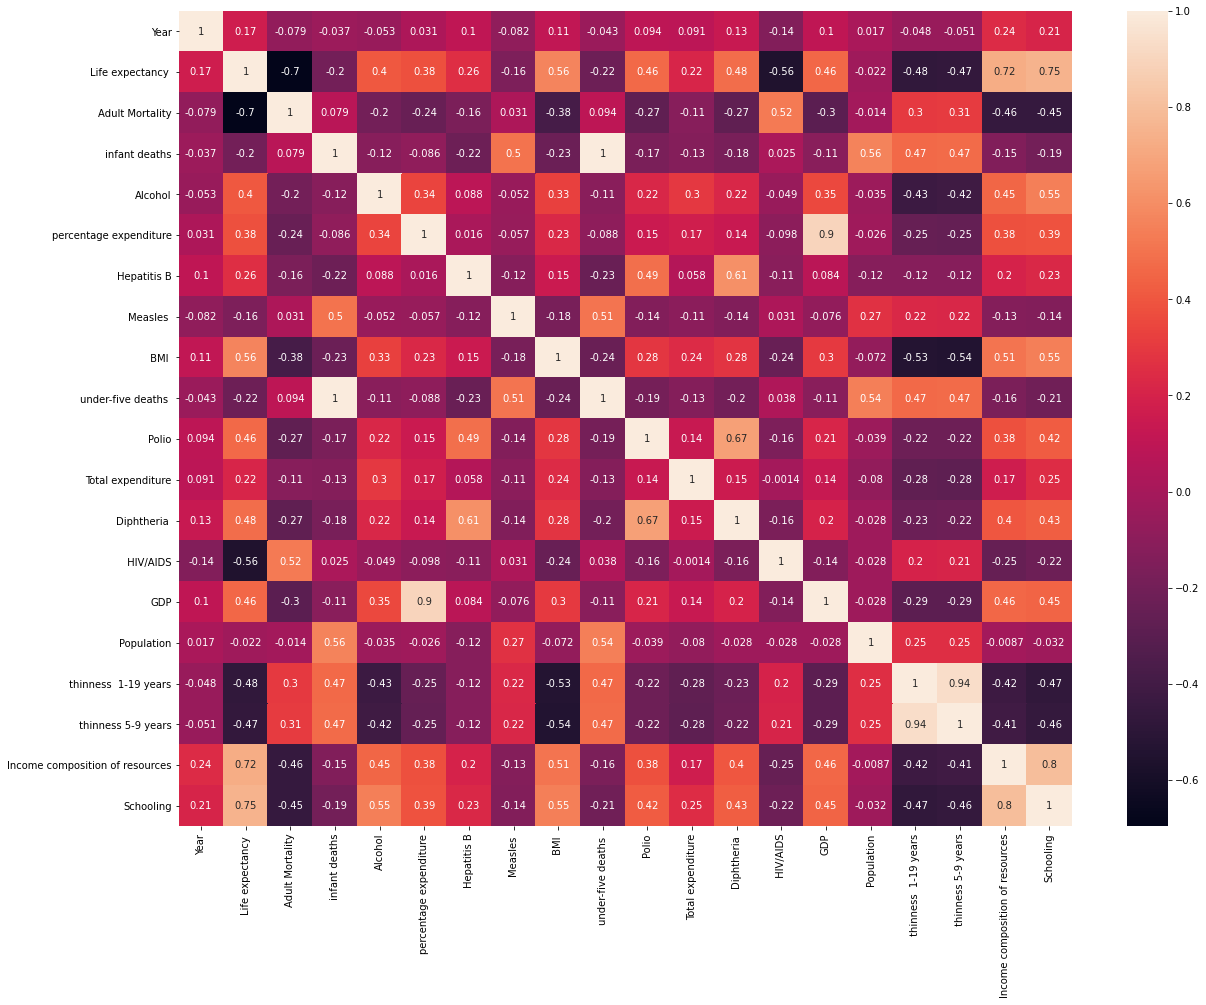

In [12]:
#Check correlations again
plt.figure(figsize = (20,15))
sns.heatmap(df_life.corr(),annot = True)

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

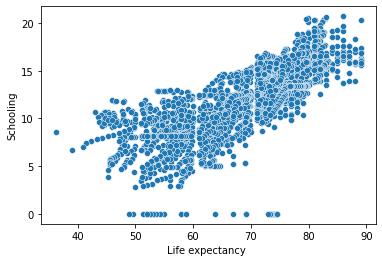

In [29]:
#Create scatterplot for exploratory analysis
sns.scatterplot(data=df_life,x='Life expectancy ',y='Schooling')

The higher number of years of schooling, the higher the life expectancy.

In [14]:
# Imputing missing values of 'Schooling' column 
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
df_life['Schooling']=df_life[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

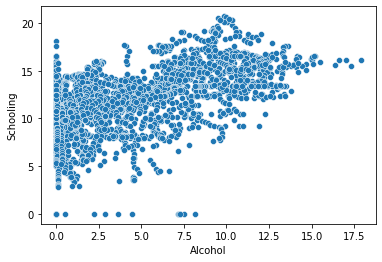

In [15]:
#Create scatterplot for exploratory analysis
sns.scatterplot(data=df_life,x='Alcohol',y='Schooling')

In [16]:
# Imputing missing values of 'Alcohol' column 
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
df_life['Alcohol']=df_life[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

<AxesSubplot:xlabel='Income composition of resources', ylabel='Life expectancy '>

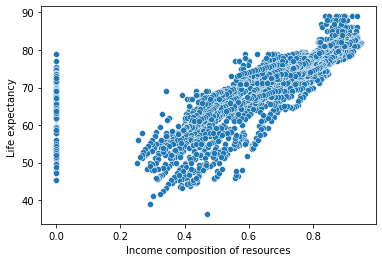

In [17]:
#Create scatterplot for exploratory analysis
sns.scatterplot(data=df_life,x='Income composition of resources',y='Life expectancy ')

The higher the income composition of resources (HDI), the higher life expectancy.

In [18]:
# Imputing missing values of 'Income composition of resources' column 
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
df_life['Income composition of resources']=df_life[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)

In [20]:
#Check for duplicates
dups = df_life.duplicated()

In [21]:
#Display duplicates
dups

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

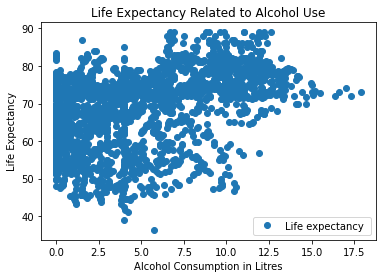

In [25]:
#Continue exploratory analysis
df_life.plot(x = 'Alcohol', y='Life expectancy ',style='o') 
plt.xlabel('Alcohol Consumption in Litres')  
plt.ylabel('Life Expectancy')  
plt.show()

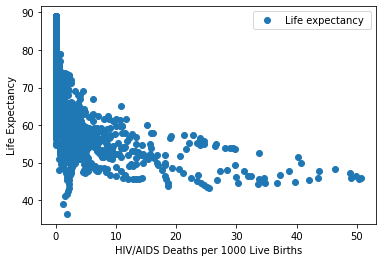

In [26]:
#Continue exploratory analysis
df_life.plot(x = ' HIV/AIDS', y='Life expectancy ',style='o') 
plt.xlabel('HIV/AIDS Deaths per 1000 Live Births')  
plt.ylabel('Life Expectancy')  
plt.show()

The higher the prevalence of HIV/AIDS deaths at birth, the lower the life expectancy of that region/country.

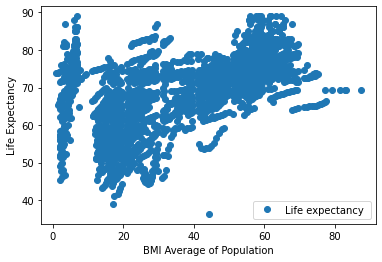

In [33]:
#Continue exploratory analysis
df_life.plot(x = ' BMI ', y='Life expectancy ',style='o') 
plt.xlabel('BMI Average of Population')  
plt.ylabel('Life Expectancy')  
plt.show()

**Hypotheses for Project**
If a person graduates college, then they will live longer.

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_life['Life expectancy '].values.reshape(-1,1)
y = df_life['Schooling'].values.reshape(-1,1)

In [35]:
X

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [37]:
y

array([[10.1],
       [10. ],
       [ 9.9],
       ...,
       [10. ],
       [ 9.8],
       [ 9.8]])

In [38]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [40]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

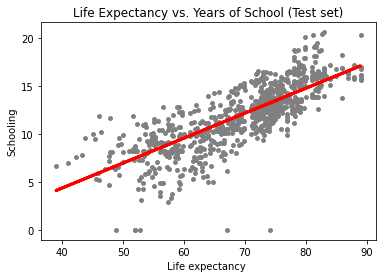

In [42]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Life Expectancy vs. Years of School (Test set)')
plot_test.xlabel('Life expectancy ')
plot_test.ylabel('Schooling')
plot_test.show()

Based on the regression line above, there are quite a few data points that are far away from the line, meaning it is likely not a good model.

In [44]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [45]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2597209]]
Mean squared error:  4.082926957339619
R2 score:  0.6301407269148187


In [46]:
y_predicted

array([[14.0609414 ],
       [11.28192776],
       [ 7.64583515],
       [ 9.95735117],
       [ 9.56776982],
       [11.98317419],
       [12.45067181],
       [15.15176918],
       [13.2817787 ],
       [ 7.46403052],
       [10.99623477],
       [16.58023414],
       [13.95705304],
       [13.74927632],
       [10.86637432],
       [13.35969497],
       [ 9.38596519],
       [10.6585976 ],
       [12.94414153],
       [15.12579709],
       [12.63247645],
       [11.10012313],
       [13.09997407],
       [14.73621574],
       [12.60650436],
       [10.08721162],
       [15.15176918],
       [13.20386243],
       [12.78830899],
       [12.97011362],
       [13.82719259],
       [ 5.77584467],
       [14.19080185],
       [13.41163915],
       [13.61941587],
       [12.60650436],
       [12.7623369 ],
       [15.20371336],
       [11.64553702],
       [12.7623369 ],
       [ 9.48985355],
       [13.82719259],
       [15.54135053],
       [12.81428108],
       [13.20386243],
       [14

In [47]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,16.5,14.060941
1,9.1,11.281928
2,9.5,7.645835
3,10.0,9.957351
4,10.0,9.567770
5,10.2,11.983174
6,13.0,12.450672
7,16.1,15.151769
8,13.7,13.281779
9,8.4,7.464031


There is quite a difference between the predicted values and the actual values. This provides evidence that this model does not do a good job of explaining the relationship between Schooling/Education and Life Expectancy. The relationship does not follow a single, straight regression.

Regarding bias: There are plenty of data biases that could be at play here-- collection bias is possible as this data is covering many countries across the world, both developed and undeveloped and ability to collect accurate and complete data across countries may vary widely.  